### Load the dataset

In [2]:
import pandas as pd
letter_data_or = pd.read_csv('letter-recognition.data',index_col= False)
letter_data_or.columns =['cap','x-box','y-box','width','height','onpix',\
                         'x-bar','y-bar','x2bar','y2bar','xybar','x2ybr',\
                         'xy2br','x-ege','xegvy','y-ege','yegvx']

In [3]:
letter_data_or.head()

,cap,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [4]:
letter_target = letter_data_or.cap
letter_data = letter_data_or[['x-box','y-box','width','height','onpix','x-bar', 'y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']]
#split the the data into data and target
letter_data= letter_data.values
letter_target = letter_target.values # generate arrays without the index columns

In [5]:
print(f'letter_data.shape    = {letter_data.shape}')
print(f'letter_target.shape  = {letter_target.shape}')

print()
print('One-dimensional array representation for Scikit-Learn:')
print(f'letter_data[5] = ')
print(letter_data[5])

print()
print('Some target values:')
print(f'letter_target[::200] = {letter_target[::200]}')

letter_data.shape    = (19999, 16)
letter_target.shape  = (19999,)

One-dimensional array representation for Scikit-Learn:
letter_data[5] = 
[ 4  2  5  4  4  8  7  6  6  7  6  6  2  8  7 10]

Some target values:
letter_target[::200] = ['I' 'Y' 'G' 'U' 'Y' 'T' 'O' 'Y' 'E' 'J' 'V' 'C' 'M' 'A' 'A' 'A' 'H' 'X'
 'C' 'L' 'D' 'G' 'A' 'Z' 'J' 'G' 'T' 'L' 'O' 'B' 'F' 'M' 'B' 'Z' 'K' 'V'
 'K' 'E' 'G' 'D' 'A' 'V' 'S' 'E' 'I' 'E' 'T' 'Q' 'W' 'K' 'J' 'F' 'A' 'T'
 'L' 'P' 'H' 'J' 'Z' 'O' 'C' 'N' 'Y' 'S' 'X' 'K' 'G' 'W' 'F' 'F' 'X' 'Q'
 'L' 'E' 'V' 'U' 'B' 'L' 'Z' 'A' 'N' 'H' 'J' 'A' 'G' 'W' 'W' 'N' 'T' 'L'
 'M' 'E' 'M' 'E' 'E' 'T' 'W' 'G' 'W' 'Y']


### Split data and train data with KNN

In [6]:
from sklearn.model_selection import train_test_split
#split data for training and tesing
x_train, x_test, y_train, y_test = train_test_split(
     letter_data, letter_target, random_state=11)

print(f'x_train.shape = {x_train.shape}')
print(f'x_test.shape  = {x_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

x_train.shape = (14999, 16)
x_test.shape  = (5000, 16)

y_train.shape = (14999,)
y_test.shape  = (5000,)


### Create and train the k-nearest neighbors model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

### Test the model by prediciting digit classes

In [8]:
predicted = knn.predict(X=x_test)
expected = y_test
print(y_test)
print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

['A' 'Y' 'O' ... 'X' 'H' 'E']
First twenty predictions:
predicted[:20] = ['A' 'Y' 'O' 'U' 'Q' 'Q' 'R' 'Q' 'S' 'X' 'M' 'D' 'R' 'T' 'D' 'I' 'B' 'S'
 'T' 'F']
 expected[:20] = ['A' 'Y' 'O' 'U' 'Q' 'Q' 'R' 'Q' 'S' 'X' 'M' 'D' 'R' 'T' 'D' 'I' 'B' 'S'
 'T' 'P']


### Find the the wrong pairs

In [9]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[('F', 'P'), ('J', 'I'), ('O', 'Q'), ('S', 'B'), ('Z', 'E'), ('B', 'D'), ('M', 'W'), ('E', 'K'), ('T', 'F'), ('Y', 'T'), ('R', 'S'), ('D', 'O'), ('C', 'G'), ('G', 'E'), ('D', 'G'), ('H', 'B'), ('T', 'F'), ('U', 'B'), ('C', 'O'), ('D', 'N'), ('B', 'K'), ('G', 'L'), ('H', 'K'), ('F', 'S'), ('E', 'X'), ('E', 'K'), ('B', 'A'), ('T', 'Y'), ('D', 'H'), ('Z', 'B'), ('D', 'H'), ('P', 'F'), ('B', 'N'), ('J', 'I'), ('D', 'F'), ('X', 'K'), ('K', 'L'), ('T', 'F'), ('J', 'I'), ('B', 'V'), ('F', 'P'), ('I', 'J'), ('B', 'D'), ('I', 'J'), ('E', 'K'), ('I', 'J'), ('L', 'K'), ('R', 'B'), ('O', 'Q'), ('H', 'R'), ('B', 'T'), ('F', 'P'), ('G', 'C'), ('B', 'V'), ('H', 'M'), ('I', 'J'), ('K', 'H'), ('F', 'P'), ('C', 'O'), ('F', 'J'), ('Q', 'E'), ('E', 'G'), ('I', 'J'), ('G', 'K'), ('J', 'I'), ('B', 'D'), ('D', 'H'), ('H', 'K'), ('V', 'M'), ('C', 'X'), ('B', 'R'), ('J', 'I'), ('B', 'R'), ('K', 'R'), ('V', 'G'), ('J', 'I'), ('D', 'N'), ('Z', 'T'), ('N', 'R'), ('Q', 'G'), ('B', 'R'), ('N', 'R

### Model prediction accuracy

In [10]:
print(f'Prediction accuracy score = {knn.score(x_test, y_test):.2%}')

Prediction accuracy score = 94.22%


### Construct Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[174   1   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 179   0   1   1   0   0   2   0   0   0   0   0   0   0   0   0   4
    1   0   1   2   0   0   0   1]
 [  0   0 184   0   0   0   3   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   7   0 178   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 179   0   3   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   0   0   0   4]
 [  0   0   0   2   1 198   0   0   0   0   0   0   0   0   0   4   0   0
    2   5   0   0   1   0   0   0]
 [  0   1   2   6   5   0 199   0   0   0   0   0   0   0   1   0   1   0
    0   0   0   1   0   0   0   0]
 [  0   1   0   7   2   0   0 156   0   0   4   0   0   0   0   0   0   6
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   2   0   0 178   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 

### Draw Heatmap

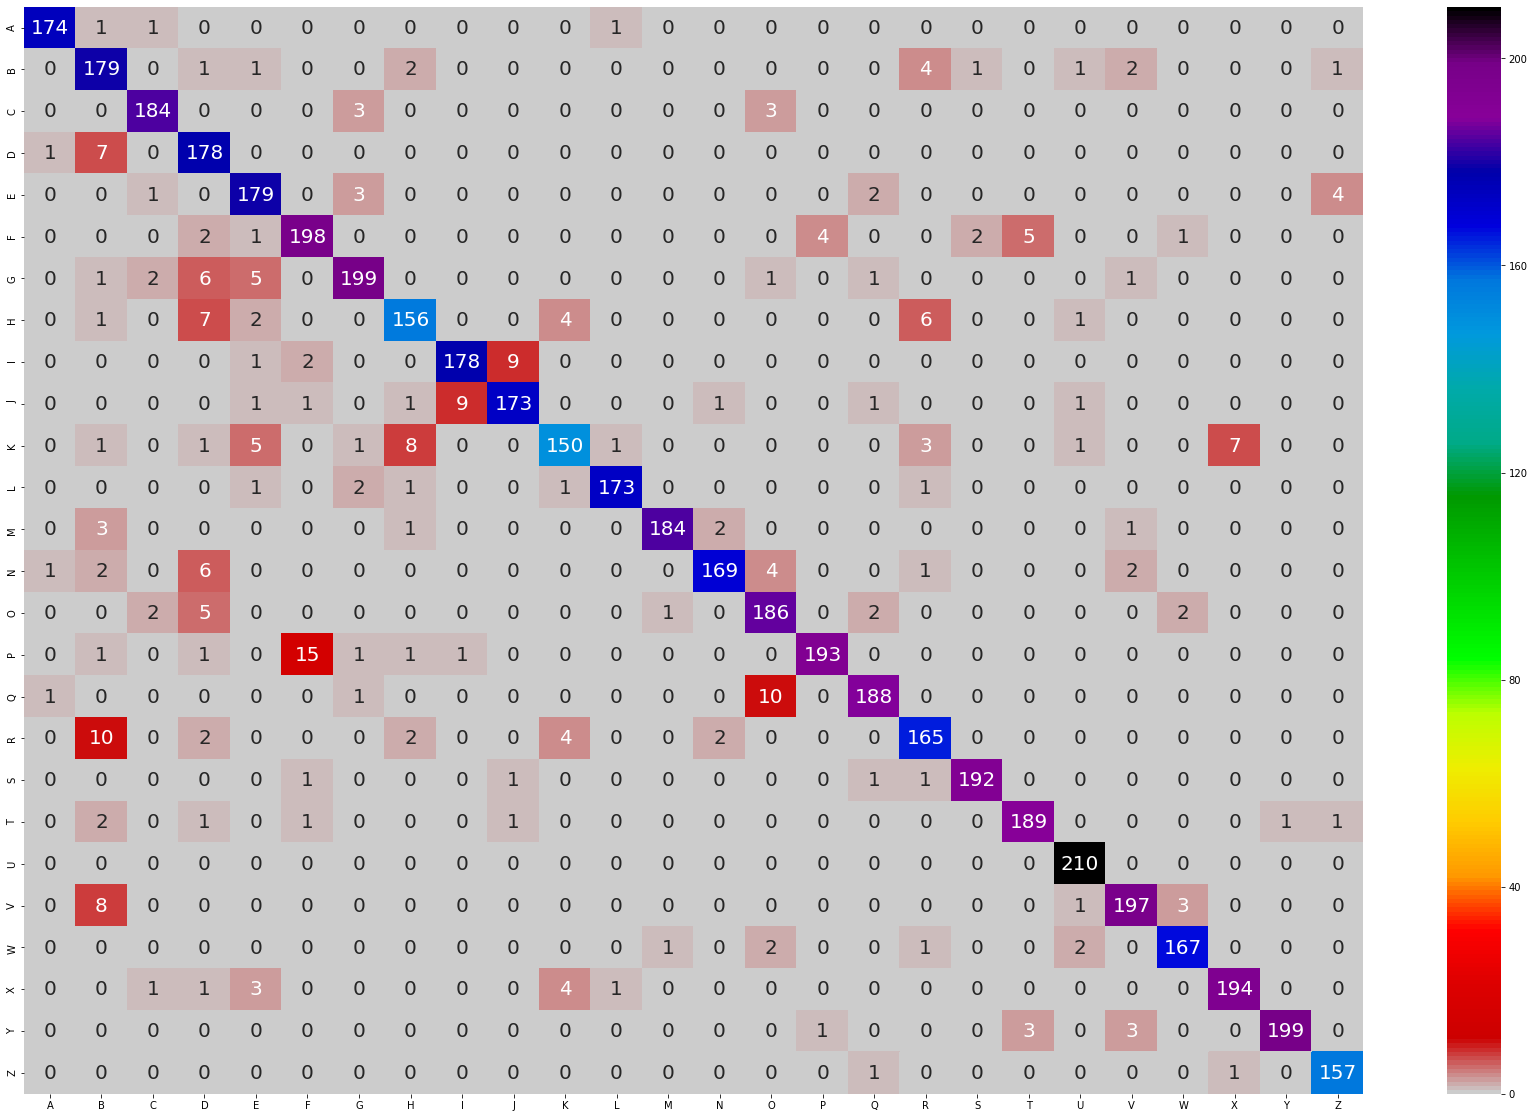

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
letter = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
confusion_df = pd.DataFrame(confusion, index=letter, columns=letter)
axes = sns.heatmap(confusion_df, annot=True,annot_kws={"size": 20},fmt="d", cmap='nipy_spectral_r')

### Classification report

In [13]:
from sklearn.metrics import classification_report

print(classification_report(expected, predicted, target_names=letter))

              precision    recall  f1-score   support

           A       0.98      0.98      0.98       177
           B       0.83      0.93      0.88       192
           C       0.96      0.97      0.97       190
           D       0.84      0.96      0.90       186
           E       0.90      0.95      0.92       189
           F       0.91      0.93      0.92       213
           G       0.95      0.92      0.93       216
           H       0.91      0.88      0.89       177
           I       0.95      0.94      0.94       190
           J       0.94      0.92      0.93       188
           K       0.92      0.84      0.88       178
           L       0.98      0.97      0.97       179
           M       0.99      0.96      0.98       191
           N       0.97      0.91      0.94       185
           O       0.90      0.94      0.92       198
           P       0.97      0.91      0.94       213
           Q       0.96      0.94      0.95       200
           R       0.91    

In our KNN analysis, the Prediction accuracy score is 94.22%. From confustion matrix, we can see: in column R, 6 letters acutally in R were predicted into H; in column X, 7 letters acutally in X were predicted into K; in column T, 5 letters acutally in T were predicted into F; in column R, 4 letters acutally in R were predicted into B.

In row P, 193 letters were correctly classifed as P, but 15 letters were classifed as F
In row R, 165 letters were correctly classifed as R, but 10 letters were classifed as B
In row Q, 188 letters were correctly classifed as Q, but 10 letters were classifed as O
In row J, 173 letters were correctly classifed as J, but 9 letters were classifed as I

Based on the classfication report, letter B and K has difficulties to predict with their f1- score both at 0.88. 